### Instalar dependencias 

In [ ]:
%pip install pandas
%pip install tabulate
%pip install matplotlib
%pip install statsmodels

### Imports del proyecto

### Documentación de Imports

#### 1. `import pandas as pd`
**Pandas** es una biblioteca de Python para el análisis de datos que proporciona estructuras de datos flexibles y herramientas para manipular, analizar y visualizar datos.
- **Documentación oficial**: [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

#### 2. `from tabulate import tabulate`
**Tabulate** es una biblioteca de Python para la impresión de datos en formato tabular en la consola o en archivos. Facilita la presentación de datos en tablas bien formateadas.
- **Documentación oficial**: [Tabulate Documentation](https://pypi.org/project/tabulate/)

#### 3. `from typing import Tuple, List`
**Typing** es un módulo de Python que proporciona soporte para anotaciones de tipo. `Tuple` y `List` se utilizan para especificar tipos en listas y tuplas.
- **Documentación oficial**: [Typing Documentation](https://docs.python.org/3/library/typing.html)

#### 4. `import matplotlib.pyplot as plt`
**Matplotlib** es una biblioteca de Python para la creación de gráficos en 2D. `pyplot` es un módulo en matplotlib que proporciona una interfaz similar a MATLAB para la generación de gráficos.
- **Documentación oficial**: [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

#### 5. `import statsmodels.api as sm`
**Statsmodels** es una biblioteca de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para la realización de pruebas estadísticas y exploración de datos.
- **Documentación oficial**: [Statsmodels Documentation](https://www.statsmodels.org/stable/index.html)

#### 6. `from statsmodels.formula.api import ols`
**Statsmodels.formula.api** es un submódulo de statsmodels que permite especificar modelos estadísticos utilizando fórmulas similares a las utilizadas en R. `ols` (Ordinary Least Squares) es una función para ajustar modelos de regresión lineal.
- **Documentación oficial**: [Statsmodels Formula API Documentation](https://www.statsmodels.org/stable/api.html#formula-api)

### Ejemplo de Uso

- **Pandas**: Para leer un archivo CSV y manipular los datos.
  ```python
  df = pd.read_csv('data.csv')


In [136]:
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import anova as sms
from statsmodels.stats import multicomp
from statsmodels.formula.api import ols
from scipy.stats import shapiro, levene


### Print  Tabulate

Esta función imprime un DataFrame en forma de tabla bien formateada.

In [ ]:
def print_tabulate(df: pd.DataFrame) -> None:
    print(tabulate(df, headers=df.columns, tablefmt='orgtbl'))

### Función `categorize`

#### Descripción

La función `categorize` toma una cadena `name` como entrada y devuelve una categoría correspondiente basada en ciertas palabras clave presentes en la cadena.

#### Parámetros

- `name` (str): La cadena a ser categorizada.

#### Retorna

- (str): La categoría correspondiente a la cadena de entrada. Las categorías posibles son: 'PREPARATORIA', 'FACULTAD', 'HOSPITAL', 'CENTRO', 'ADMIN' y 'OTRO'.

#### Ejemplos

- `categorize('PREPARATORIA 1')` retorna 'PREPARATORIA'
- `categorize('FACULTAD DE INGENIERÍA')` retorna 'FACULTAD'
- `categorize('HOSPITAL GENERAL')` retorna 'HOSPITAL'
- `categorize('CENTRO DE INVESTIGACIÓN')` retorna 'CENTRO'
- `categorize('SECRETARÍA ACADÉMICA')` retorna 'ADMIN'
- `categorize('OTRO EDIFICIO')` retorna 'OTRO'

In [ ]:
import re

def categorize(name: str) -> str:
    name = name.upper()  # Asegurarse de que la comparación no sea sensible a mayúsculas/minúsculas

    patterns = {
        'PREPARATORIA': r'PREPARATORIA|PREPA\.',
        'FACULTAD': r'FACULTAD|FAC\.',
        'HOSPITAL': r'HOSPITAL',
        'CENTRO': r'CENTRO|CTRO\.|C\.|INVESTIGAC',
        'ADMIN': r'SECRETAR[ÍI]A|SRIA\.|DIRECCI[ÓO]N|DEPARTAMENTO|DEPTO\.|CONTRALORIA|AUDITORIA|TESORERIA|'
                 r'ESCOLAR|ABOGAC[ÍI]A|JUNTA|RECTORIA|IMAGEN'
    }

    for category, pattern in patterns.items():
        if re.search(pattern, name):
            return category

    return 'OTRO'


### Función `transform_into_typed_df`

#### Descripción

La función `transform_into_typed_df` toma un DataFrame `raw_df` como entrada y realiza una serie de transformaciones en él antes de devolverlo. Las transformaciones incluyen la creación de una nueva columna 'Fecha' a partir de las columnas 'anio' y 'mes', la eliminación de las columnas 'anio' y 'mes', y la aplicación de la función `categorize` a la columna 'dependencia' para crear una nueva columna 'Tipo'.

#### Parámetros

- `raw_df` (pd.DataFrame): El DataFrame a ser transformado.

#### Retorna

- (pd.DataFrame): El DataFrame transformado.

#### Ejemplo

- `raw_df = pd.DataFrame({'anio': [2020, 2021], 'mes': [1, 2], 'dependencia': ['PREPARATORIA 1', 'FACULTAD DE INGENIERÍA']})`
- `transform_into_typed_df(raw_df)` retorna un DataFrame con las columnas 'Fecha' y 'Tipo' agregadas, y las columnas 'anio' y 'mes' eliminadas.


In [ ]:
def transform_into_typed_df(raw_df: pd.DataFrame) -> pd.DataFrame:
    # Crear la columna 'Fecha' combinando 'anio' y 'mes'
    raw_df["Fecha"] = pd.to_datetime(raw_df["anio"].astype(str) + "-" + raw_df["mes"].astype(str), format="%Y-%m")
    
    # Eliminar las columnas 'anio' y 'mes'
    raw_df.drop(['anio', 'mes'], axis=1, inplace=True)
    
    # Aplicar la función 'categorize' a la columna 'dependencia' para crear la columna 'Tipo'
    raw_df["Tipo"] = raw_df["dependencia"].apply(categorize)
    
    return raw_df


### Función `analysis_dependencia`

#### Descripción

La función `analysis_dependencia` toma un DataFrame `df_complete` como entrada y realiza una serie de transformaciones en él para obtener un DataFrame agregado por 'Tipo' y 'anio'. Las transformaciones incluyen la conversión de la columna 'Fecha' a tipo datetime, la extracción del año de la columna 'Fecha', y el cálculo de las agregaciones necesarias para la columna 'Sueldo Neto'.

#### Parámetros

- `df_complete` (pd.DataFrame): El DataFrame completo a ser analizado.

#### Retorna

- (pd.DataFrame): Un DataFrame agregado por 'Tipo' y 'anio' con las agregaciones necesarias para la columna 'Sueldo Neto'.

#### Ejemplo

- `df_complete = pd.DataFrame({'Fecha': ['2020-01-01', '2021-02-01'], 'Tipo': ['PREPARATORIA', 'FACULTAD'], 'Sueldo Neto': [1000, 2000]})`
- `analysis_dependencia(df_complete)` retorna un DataFrame con las columnas 'Suma_Total_sueldos', 'Conteo_Empleados', 'Promedio_sueldo', 'Salario_Minimo' y 'Salario_Maximo' agregadas y las filas agrupadas por 'Tipo' y 'anio'.


In [ ]:
import pandas as pd

def analysis_dependencia(df_complete: pd.DataFrame) -> pd.DataFrame:
    # Convertir la columna 'Fecha' a tipo datetime
    df_complete["Fecha"] = pd.to_datetime(df_complete["Fecha"], format="%Y-%m-%d")
    
    # Extraer el año de la columna 'Fecha'
    df_complete["anio"] = df_complete["Fecha"].dt.year
    
    # Agrupar por 'Tipo' y 'anio' y calcular las agregaciones necesarias
    df_by_dep = df_complete.groupby(["Tipo", "anio"])['Sueldo Neto'].agg(['sum', 'count', 'mean', 'min', 'max']).reset_index()
    
    # Renombrar las columnas del DataFrame resultante
    df_by_dep.columns = ['Tipo', 'anio', 'Suma_Total_sueldos', 'Conteo_Empleados', 'Promedio_sueldo', 'Salario_Minimo', 'Salario_Maximo']
    
    # Imprimir las primeras filas del DataFrame
    print_tabulate(df_by_dep.head())
    
    return df_by_dep


### Función `create_boxplot_by_type`

#### Descripción

La función `create_boxplot_by_type` toma un nombre de archivo `file_name` y una columna `column` como entrada, y crea un boxplot de la columna 'Sueldo Neto' agrupada por la columna especificada y 'Fecha'. La función de agregación utilizada para agrupar los datos se puede especificar mediante el parámetro opcional `agg_fn`.

#### Parámetros

- `file_name` (str): El nombre del archivo CSV a ser leído.
- `column` (str): La columna por la cual se desea agrupar los datos para crear el boxplot.
- `agg_fn` (función, opcional): La función de agregación a utilizar al agrupar los datos. Por defecto, se utiliza la función `pd.DataFrame.sum`.

#### Ejemplo

- `create_boxplot_by_type('data.csv', 'Tipo')` crea un boxplot de la columna 'Sueldo Neto' agrupada por la columna 'Tipo' y 'Fecha', utilizando la función `pd.DataFrame.sum` para agrupar los datos.


In [89]:
def create_boxplot_by_type(file_name: str, column: str, agg_fn=pd.Series.sum):
    # Leer el archivo CSV
    df_complete = pd.read_csv(file_name)
    
    # Agrupar por la columna especificada y 'Fecha', aplicando la función de agregación
    df_by_type = df_complete.groupby([column, "Fecha"])["Sueldo Neto"].agg(agg_fn).reset_index()
    
    # Crear el boxplot
    df_by_type.boxplot(column="Sueldo Neto", by=column, figsize=(27, 18))
    
    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=90)
    
    # Guardar la figura del boxplot en un archivo
    plt.savefig(f"img/boxplot_{column}.png")

    # Mostrar la imagen en Jupyter Notebook
    plt.show()
    
    # Cerrar la figura para liberar memoria
    plt.close()

### Función `plot_by_dep`

#### Descripción

La función `plot_by_dep` toma un DataFrame `df` y una cadena `dep` como entrada, y crea un plot de la columna 'Sueldo Neto' para la dependencia especificada en `dep`.

#### Parámetros

- `df` (pd.DataFrame): El DataFrame a ser filtrado y utilizado para crear el plot.
- `dep` (str): La dependencia por la cual se desea filtrar el DataFrame y crear el plot.

#### Ejemplo

- `plot_by_dep(df_complete, 'PREPARATORIA')` crea un plot de la columna 'Sueldo Neto' para la dependencia 'PREPARATORIA'.

In [ ]:
def plot_by_dep(df: pd.DataFrame, dep: str) -> None:
    # Filtrar el DataFrame por la dependencia especificada
    df_filtered = df[df["dependencia"] == dep]
    
    # Crear el plot de "Sueldo Neto"
    df_filtered.plot(y="Sueldo Neto")
    
    # Guardar la figura del plot en un archivo
    plt.savefig(f"img/lt_{dep}.png")
    
    # Cerrar la figura para liberar memoria
    plt.close()

### Función `create_plot_por_dependencia`

#### Descripción

La función `create_plot_por_dependencia` toma un nombre de archivo `file_name` como entrada y crea varios plots de la columna 'Sueldo Neto' para cada dependencia única presente en el DataFrame. Además, crea un plot adicional de la columna 'Sueldo Neto' promedio para cada dependencia a lo largo del tiempo.

#### Parámetros

- `file_name` (str): El nombre del archivo CSV a ser leído.

#### Ejemplo

- `create_plot_por_dependencia('data.csv')` crea varios plots de la columna 'Sueldo Neto' para cada dependencia única presente en el DataFrame, y un plot adicional de la columna 'Sueldo Neto' promedio para cada dependencia a lo largo del tiempo.

In [122]:
def create_plot_por_dependencia(file_name: str) -> None:
    df_complete = pd.read_csv(file_name)
    
    # Agrupar por 'dependencia' y 'Fecha', y contar 'Sueldo Neto'
    df_by_dep = df_complete.groupby(["dependencia", "Fecha"])["Sueldo Neto"].count().reset_index()
    
    # Establecer 'Fecha' como índice
    df_by_dep.set_index("Fecha", inplace=True)
    
    # Crear gráficos por cada dependencia
    for dep in df_by_dep["dependencia"].unique():
        plot_by_dep(df_by_dep, dep)
    
    # Agrupar por 'Fecha' y 'dependencia', y calcular la media de 'Sueldo Neto'
    df_aux = df_complete.groupby(["Fecha", "dependencia"]).agg(
        Promedio_sueldo=('Sueldo Neto', 'mean')
    ).unstack()

    # Crear el gráfico de 'Promedio_sueldo' por 'dependencia' a lo largo del tiempo
    df_aux.plot(y='Promedio_sueldo', legend=False, figsize=(32, 18))
    plt.xticks(rotation=90)
    plt.savefig("img/foo.png")
    plt.show()  # Mostrar la imagen en Jupyter Notebook
    plt.close()

### Función `anova`

#### Descripción

La función `anova` toma un DataFrame `df_aux` y una cadena `str_ols` como entrada, y realiza una serie de pruebas estadísticas para determinar si existen diferencias significativas entre los grupos presentes en la columna 'Grupo' del DataFrame. Las pruebas incluyen el test de Shapiro-Wilk para normalidad, el test de Levene para homogeneidad de varianzas, y un modelo de regresión lineal con la función `ols` de la biblioteca `statsmodels`. Además, se realiza una prueba post-hoc de Tukey HSD si el resultado del modelo de regresión lineal es significativo.

#### Parámetros

- `df_aux` (pd.DataFrame): El DataFrame a ser utilizado para las pruebas estadísticas.
- `str_ols` (str): La cadena que especifica el modelo de regresión lineal a ser utilizado.

#### Ejemplo

- `anova(df_aux, 'Sueldo Neto ~ Grupo')` realiza las pruebas estadísticas para determinar si existen diferencias significativas entre los grupos presentes en la columna 'Grupo' del DataFrame `df_aux`, utilizando el modelo de regresión lineal especificado en la cadena `'Sueldo Neto ~ Grupo'`.

In [139]:
def anova(df_aux: pd.DataFrame, str_ols: str) -> None:
    # Shapiro-Wilk test for normality
    shapiro_test = shapiro(df_aux['GastoSalarios'])
    print(f"Shapiro-Wilk test: {shapiro_test}")

    # Levene's test for homogeneity of variances
    levene_test = levene(*[group["GastoSalarios"].values for name, group in df_aux.groupby('Tipo')])
    print(f"Levene's test: {levene_test}")

    # OLS model fitting
    model = ols(str_ols, data=df_aux).fit()

    # ANOVA table
    anova_df = sms.anova_lm(model, typ=2)
    
    # Print results based on p-value
    if anova_df["PR(>F)"].iloc[0] < 0.005:
        print("Hay diferencias")
        print(anova_df)
        # Tukey's HSD test
        tukey_result = multicomp.pairwise_tukeyhsd(df_aux['GastoSalarios'], df_aux['Tipo'])
        print(tukey_result)
    else:
        print("No hay diferencias")

### Función `anova_1`

#### Descripción

La función `anova_1` toma un nombre de archivo `file_name` como entrada y realiza un análisis ANOVA para determinar si existen diferencias significativas en el gasto en salarios entre los tipos "CENTRO" y "OTRO". La función primero agrupa el DataFrame por la columna 'Tipo' y 'Fecha', sumando la columna 'Sueldo Neto'. Luego, renombra la columna 'Sueldo Neto' a 'GastoSalarios' y elimina la columna 'Fecha'. Finalmente, filtra el DataFrame para incluir solo los tipos "CENTRO" y "OTRO", y realiza el análisis ANOVA utilizando la función `anova`.

#### Parámetros

- `file_name` (str): El nombre del archivo CSV a ser leído.

#### Ejemplo

- `anova_1('data.csv')` realiza el análisis ANOVA para determinar si existen diferencias significativas en el gasto en salarios entre los tipos "CENTRO" y "OTRO" presentes en el DataFrame obtenido del archivo 'data.csv'.


In [ ]:
def anova_1(file_name: str) -> None:
    df_complete = pd.read_csv(file_name)
    
    # Agrupar por 'Tipo' y 'Fecha', sumando 'Sueldo Neto'
    df_by_type = df_complete.groupby(["Tipo", "Fecha"])["Sueldo Neto"].sum().reset_index()
    
    # Renombrar la columna 'Sueldo Neto' a 'GastoSalarios' y eliminar la columna 'Fecha'
    df_aux = df_by_type.rename(columns={"Sueldo Neto": "GastoSalarios"}).drop(columns=['Fecha'])
    
    # Filtrar el DataFrame para incluir solo los tipos "CENTRO" y "OTRO"
    df_aux = df_aux[df_aux["Tipo"].isin(["CENTRO", "OTRO"])]
    
    # Imprimir las primeras filas del DataFrame resultante
    print(df_aux.head())
    
    # Realizar el análisis ANOVA
    anova(df_aux, "GastoSalarios ~ Tipo")

### Función `analysis`

#### Descripción

La función `analysis` toma un nombre de archivo `file_name` como entrada y realiza un análisis estadístico de los datos contenidos en el archivo. La función primero agrupa el DataFrame por la columna 'dependencia' y 'Fecha', sumando la columna 'Sueldo Neto'. Luego, agrupa el DataFrame por la columna 'Tipo' y 'Fecha', sumando la columna 'Sueldo Neto'. A continuación, crea un boxplot de la columna 'Sueldo Neto' por 'Tipo'. Finalmente, realiza un análisis ANOVA para determinar si existen diferencias significativas en el gasto en salarios entre los diferentes tipos de dependencias.

#### Parámetros

- `file_name` (str): El nombre del archivo CSV a ser leído.

#### Ejemplo

- `analysis('data.csv')` realiza el análisis estadístico de los datos contenidos en el archivo 'data.csv'.

In [85]:
def analysis(file_name: str) -> None:
    df_complete = pd.read_csv(file_name)

    # Agrupar por 'dependencia' y 'Fecha', sumando 'Sueldo Neto'
    df_by_dep = df_complete.groupby(["dependencia", "Fecha"])["Sueldo Neto"].sum().reset_index()
    df_by_dep.set_index("Fecha", inplace=True)

    # Agrupar por 'Tipo' y 'Fecha', sumando 'Sueldo Neto'
    df_by_type = df_complete.groupby(["Tipo", "Fecha"])["Sueldo Neto"].sum().reset_index()
    
    # Crear el boxplot por 'Tipo'
    df_by_type.boxplot(column="Sueldo Neto", by='Tipo', figsize=(18, 9))
    plt.xticks(rotation=90)
    plt.savefig("img/boxplot_tipo.png")
    plt.show()  # Mostrar la imagen en Jupyter Notebook
    plt.close()
    
    # Preparar los datos para el análisis ANOVA
    df_aux = df_by_type.rename(columns={"Sueldo Neto": "GastoSalarios"}).drop(columns=['Fecha'])
    print(df_aux.head())
    
    # Ajustar el modelo OLS y realizar ANOVA
    model = ols("GastoSalarios ~ Tipo", data=df_aux).fit()
    anova_df = sm.stats.anova_lm(model, typ=2)
    
    # Evaluar los resultados del ANOVA
    if anova_df["PR(>F)"].iloc[0] < 0.005:
        print("Hay diferencias")
        print(anova_df)
        # Aquí puedes añadir la prueba de Tukey si es necesario
    else:
        print("No hay diferencias")

### Función `create_typed_df`

#### Descripción

La función `create_typed_df` toma un nombre de archivo `filename` como entrada y devuelve un DataFrame transformado y tipado. La función primero lee el archivo CSV utilizando `pd.read_csv` y luego llama a la función `transform_into_typed_df` para transformar y tipar el DataFrame.

#### Parámetros

- `filename` (str): El nombre del archivo CSV a ser leído.

#### Retorna

- `pd.DataFrame`: El DataFrame transformado y tipado.

#### Ejemplo

- `df = create_typed_df('data.csv')` lee el archivo 'data.csv' y devuelve un DataFrame transformado y tipado.


In [ ]:
def create_typed_df(filename: str) -> pd.DataFrame:
    df_complete = pd.read_csv(filename)
    return transform_into_typed_df(df_complete)


### Función `show_type_of_department`

#### Descripción

La función `show_type_of_department` muestra una tabla con las primeras 150 filas únicas de las columnas 'dependencia' y 'Tipo' del DataFrame pre-cargado desde el archivo 'typed_uanl.csv'.

#### Parámetros

- No hay parámetros para esta función.

#### Retorna

- No hay valor de retorno para esta función.

#### Ejemplo

- `show_type_of_department()` muestra una tabla con las primeras 150 filas únicas de las columnas 'dependencia' y 'Tipo' del DataFrame pre-cargado.


In [ ]:
def show_type_of_department():
    df_complete = pd.read_csv("csv/typed_uanl.csv")
    
    # Usa el DataFrame pre-cargado
    print_tabulate(df_complete[["dependencia","Tipo"]].drop_duplicates().head(150))

### Función `show_data_by_dependency_and_date`

#### Descripción

La función `show_data_by_dependency_and_date` muestra una tabla con los primeros 50 registros de la suma de la columna 'Sueldo Neto' agrupados por 'dependencia' y 'Fecha' del DataFrame pre-cargado desde el archivo 'typed_uanl.csv', filtrados por la dependencia 'FAC. DE CIENCIAS FISICO-MATEMATICAS'.

#### Parámetros

- No hay parámetros para esta función.

#### Retorna

- No hay valor de retorno para esta función.

#### Ejemplo

- `show_data_by_dependency_and_date()` muestra una tabla con los primeros 50 registros de la suma de la columna 'Sueldo Neto' agrupados por 'dependencia' y 'Fecha' del DataFrame pre-cargado, filtrados por la dependencia 'FAC. DE CIENCIAS FISICO-MATEMATICAS'.


In [ ]:
def show_data_by_dependency_and_date():
    df = pd.read_csv("csv/typed_uanl.csv")
    df_by_dep = df.groupby(["dependencia", "Fecha"])[["Sueldo Neto"]].sum().reset_index()
    df_by_dep.set_index("Fecha", inplace=True)
    selected_data = df_by_dep[df_by_dep["dependencia"] == "FAC. DE CIENCIAS FISICO-MATEMATICAS"].head(50)
    print_tabulate(selected_data)

### Función `show_data_by_type_and_date`

#### Descripción

La función `show_data_by_type_and_date` muestra una tabla con las primeras 150 filas de la suma de la columna 'Sueldo Neto' agrupadas por 'Tipo' y 'Fecha' del DataFrame pre-cargado desde el archivo 'typed_uanl.csv'.

#### Parámetros

- No hay parámetros para esta función.

#### Retorna

- No hay valor de retorno para esta función.

#### Ejemplo

- `show_data_by_type_and_date()` muestra una tabla con las primeras 150 filas de la suma de la columna 'Sueldo Neto' agrupadas por 'Tipo' y 'Fecha' del DataFrame pre-cargado.


In [ ]:
def show_data_by_type_and_date():
    df = pd.read_csv("csv/typed_uanl.csv")
    df_by_type = df.groupby(["Tipo", "Fecha"])[["Sueldo Neto"]].sum().reset_index()
    df_by_type.set_index("Fecha", inplace=True)
    print_tabulate(df_by_type.head(150))

## Función `show_salary_and_count_by_type_and_date`

Esta función muestra una tabla con los primeros 150 registros agrupados por 'Tipo' y 'Fecha' del conjunto de datos completo, calculando los siguientes agregados:
- Total de sueldos
- Conteo de empleados
- Promedio de sueldos
- Salario máximo

**Parámetros:**
- Ninguno

**Retorna:**
- Ninguno

**Efectos secundarios:**
- Imprime la tabla en la consola

**Notas:**
- La función utiliza la función `groupby` de pandas para agrupar los datos por 'Tipo' y 'Fecha' y calcular los agregados deseados. Luego, utiliza la función `print_tabulate` para imprimir los primeros 150 registros en formato tabulado.


In [ ]:
def show_salary_and_count_by_type_and_date() -> None:
    df_complete = pd.read_csv("csv/typed_uanl.csv")
    
    # Agrupar por 'Tipo' y 'Fecha' y calcular agregados
    df_by_type = df_complete.groupby(["Tipo", "Fecha"]).agg(
       Total_sueldos=('Sueldo Neto', 'sum'),
       Conteo_Empleado=('Sueldo Neto', 'count'),
       Promedio_sueldo=('Sueldo Neto', 'mean'),
       Salario_Maximo=('Sueldo Neto', 'min')
    ).reset_index()

    # Establecer 'Fecha' como índice
    df_by_type.set_index("Fecha", inplace=True)
    
    # Imprimir los primeros 150 registros en formato tabulado
    print_tabulate(df_by_type.head(150))

## Función `show_salary_and_count_by_type_and_date`

Esta función muestra una tabla con los primeros 150 registros agrupados por 'Tipo' y 'Fecha' del conjunto de datos completo, calculando los siguientes agregados:
- Total de sueldos
- Conteo de empleados
- Promedio de sueldos
- Salario máximo

**Parámetros:**
- Ninguno

**Retorna:**
- Ninguno

**Efectos secundarios:**
- Imprime la tabla en la consola

**Notas:**
- La función utiliza la función `groupby` de pandas para agrupar los datos por 'Tipo' y 'Fecha' y calcular los agregados deseados. Luego, utiliza la función `print_tabulate` para imprimir los primeros 150 registros en formato tabulado.

In [ ]:
def show_salary_and_count_by_dependency_and_date() -> None:
    df_complete = pd.read_csv("csv/typed_uanl.csv")
    
    # Agrupar por 'dependencia' y 'Fecha' y calcular agregados
    df_by_type = df_complete.groupby(["dependencia", "Fecha"]).agg(
        Total_sueldos=('Sueldo Neto', 'sum'),
        Conteo_Empleado=('Sueldo Neto', 'count'),
        Promedio_sueldo=('Sueldo Neto', 'mean'),
        Salario_Maximo=('Sueldo Neto', 'max')
    ).reset_index()
    
    # Renombrar las columnas correctamente
    df_by_type.columns = ['Dependencia', 'Fecha', 'Total_sueldos', 'Conteo_Empleado', 'Promedio_sueldo', 'Salario_Maximo']
    
    # Establecer 'Fecha' como índice
    df_by_type.set_index("Fecha", inplace=True)
    
    # Imprimir los registros en formato tabulado
    print_tabulate(df_by_type)

# Ejecución de análisis de información

## Ordenar y categorizar información inicial

1. Lee el archivo de sueldos de la universidad
2. Agrupa la columna años y mes para formar la columna Fecha
3. Clasifica `dependencia` en categorías previamente identificadas y lo guarda en la columna `Tipo`
4. Guarda los cambios en un archivo llamado `typed_uanl.csv`

In [ ]:
typed_df = create_typed_df("csv/uanl.csv")
print_tabulate(typed_df.head(50))
typed_df.to_csv("csv/typed_uanl.csv", index=False)

|    | Nombre                              |   Sueldo Neto | dependencia        | Fecha               | Tipo   |
|----+-------------------------------------+---------------+--------------------+---------------------+--------|
|  0 | BRENDA AZENETH PICAZO GARCIA        |       8620.34 | JUNTA DE GOBIERNO  | 2019-12-01 00:00:00 | ADMIN  |
|  1 | MARIA BEATRIZ VILLAGOMEZ GONZALEZ   |       7401.35 | JUNTA DE GOBIERNO  | 2019-12-01 00:00:00 | ADMIN  |
|  2 | MARTHA ALICIA SILVA HERNANDEZ       |       5326.98 | JUNTA DE GOBIERNO  | 2019-12-01 00:00:00 | ADMIN  |
|  3 | ALBERTINA DAVILA PUENTE             |       9483.1  | RECTORIA           | 2019-12-01 00:00:00 | ADMIN  |
|  4 | AMELIA GRACIELA MARTINEZ DE LA PENA |       9278.1  | RECTORIA           | 2019-12-01 00:00:00 | ADMIN  |
|  5 | AURORA MARINA GOMEZ GUZMAN          |       5689.99 | RECTORIA           | 2019-12-01 00:00:00 | ADMIN  |
|  6 | CARLOS RAFAEL PALOMO ARREDONDO      |       6029.96 | RECTORIA           | 2019-12-01 00:

# Agrupa la información por tipo y fecha 

Se generá un análisis descriptivo
- Suma Total de sueldos
- Conteo Empleados
- Promedio del sueldo
- Salario Mínimo
- Salario Máximo

Guarda los cambios en un archivo llamado `analyzed_uanl.csv`

In [ ]:
analyzed_df = analysis_dependencia(typed_df)
analyzed_df.to_csv("csv/analyzed_uanl.csv", index=False)

|    | Tipo   |   anio |   Suma_Total_sueldos |   Conteo_Empleados |   Promedio_sueldo |   Salario_Minimo |   Salario_Maximo |
|----+--------+--------+----------------------+--------------------+-------------------+------------------+------------------|
|  0 | ADMIN  |   2019 |          1.82356e+07 |               1732 |           10528.7 |          1868.27 |          81117.3 |
|  1 | ADMIN  |   2020 |          2.46307e+08 |              20830 |           11824.6 |           177.2  |          92810.9 |
|  2 | ADMIN  |   2021 |          2.48742e+08 |              17842 |           13941.4 |           544.11 |         121782   |
|  3 | ADMIN  |   2022 |          2.24142e+08 |              16604 |           13499.3 |           198.64 |         140206   |
|  4 | ADMIN  |   2023 |          1.96837e+07 |               1535 |           12823.2 |          1621.49 |         107790   |


# Sueldo Neto por dependencia

Muestra el salario de cada mes de una dependencia

In [ ]:
show_data_by_dependency_and_date()

|            | dependencia                         |   Sueldo Neto |
|------------+-------------------------------------+---------------|
| 2019-12-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.24839e+06 |
| 2020-01-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.26717e+06 |
| 2020-02-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.39545e+06 |
| 2020-03-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.50552e+06 |
| 2020-04-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.70681e+06 |
| 2020-05-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.56786e+06 |
| 2020-06-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.1006e+06  |
| 2020-07-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.25712e+06 |
| 2020-08-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.2327e+06  |
| 2020-09-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.44654e+06 |
| 2020-10-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.4368e+06  |
| 2020-11-01 | FAC. DE CIENCIAS FISICO-MATEMATICAS |   3.26801e+06 |
| 2020-12-01 | FAC. DE CIENCIAS FI

# Sueldo neto por tipo

Muestra el salario de cada mes

- PREPARATORIA
- FACULTAD
- HOSPITAL
- CENTRO
- ADMIN
- OTRO

In [ ]:
show_data_by_type_and_date()

|            | Tipo     |   Sueldo Neto |
|------------+----------+---------------|
| 2019-12-01 | ADMIN    |   1.82356e+07 |
| 2020-01-01 | ADMIN    |   1.89355e+07 |
| 2020-02-01 | ADMIN    |   1.89924e+07 |
| 2020-03-01 | ADMIN    |   1.92149e+07 |
| 2020-04-01 | ADMIN    |   1.978e+07   |
| 2020-05-01 | ADMIN    |   1.99121e+07 |
| 2020-06-01 | ADMIN    |   1.80013e+07 |
| 2020-07-01 | ADMIN    |   1.98504e+07 |
| 2020-08-01 | ADMIN    |   2.02452e+07 |
| 2020-09-01 | ADMIN    |   2.01326e+07 |
| 2020-10-01 | ADMIN    |   1.99694e+07 |
| 2020-11-01 | ADMIN    |   1.92227e+07 |
| 2020-12-01 | ADMIN    |   3.20506e+07 |
| 2021-01-01 | ADMIN    |   2.21569e+07 |
| 2021-02-01 | ADMIN    |   2.25739e+07 |
| 2021-03-01 | ADMIN    |   2.29115e+07 |
| 2021-04-01 | ADMIN    |   2.32784e+07 |
| 2021-05-01 | ADMIN    |   2.32765e+07 |
| 2021-06-01 | ADMIN    |   2.85818e+07 |
| 2021-07-01 | ADMIN    |   2.24021e+07 |
| 2021-08-01 | ADMIN    |   2.23225e+07 |
| 2021-09-01 | ADMIN    |   2.2210

# Análsis descriptivo por tipo de dependencia

Desglosado por tipo de dependencia y fecha
- Total de sueldos
- Conteo de empleados
- Promedio de sueldo
- Salario máximo

In [ ]:
show_salary_and_count_by_type_and_date()

|            | Tipo     |   Total_sueldos |   Conteo_Empleado |   Promedio_sueldo |   Salario_Maximo |
|------------+----------+-----------------+-------------------+-------------------+------------------|
| 2019-12-01 | ADMIN    |     1.82356e+07 |              1732 |          10528.7  |          1868.27 |
| 2020-01-01 | ADMIN    |     1.89355e+07 |              1731 |          10939.1  |          2011.98 |
| 2020-02-01 | ADMIN    |     1.89924e+07 |              1733 |          10959.3  |          2218.23 |
| 2020-03-01 | ADMIN    |     1.92149e+07 |              1740 |          11043.1  |           177.2  |
| 2020-04-01 | ADMIN    |     1.978e+07   |              1733 |          11413.7  |          2874.47 |
| 2020-05-01 | ADMIN    |     1.99121e+07 |              1722 |          11563.3  |           583.16 |
| 2020-06-01 | ADMIN    |     1.80013e+07 |              1736 |          10369.4  |          1299.26 |
| 2020-07-01 | ADMIN    |     1.98504e+07 |              1726 |          

# Análsis descriptivo por dependencia

Desglosado por dependencia y fecha
- Suma total de salarios
- Conteo de empleados
- Promedio de sueldo
- Salario máximo

In [103]:
show_salary_and_count_by_dependency_and_date()

|            | Dependencia                                                   |    Total_sueldos |   Conteo_Empleado |   Promedio_sueldo |   Salario_Maximo |
|------------+---------------------------------------------------------------+------------------+-------------------+-------------------+------------------|
| 2019-12-01 | AUDITORIA INTERNA DE LA U.A.N.L.                              | 522851           |                55 |           9506.38 |         36971.5  |
| 2020-01-01 | AUDITORIA INTERNA DE LA U.A.N.L.                              | 538866           |                54 |           9979.01 |         39246.7  |
| 2020-02-01 | AUDITORIA INTERNA DE LA U.A.N.L.                              | 566887           |                54 |          10497.9  |         39292.5  |
| 2020-03-01 | AUDITORIA INTERNA DE LA U.A.N.L.                              | 559181           |                54 |          10355.2  |         37895    |
| 2020-04-01 | AUDITORIA INTERNA DE LA U.A.N.L.           

# Boxplot

Genera un box plot por tipo y Salario Neto y genera un analisis de ANOVA usando el modelo GastoSalarios ~ Tipo 

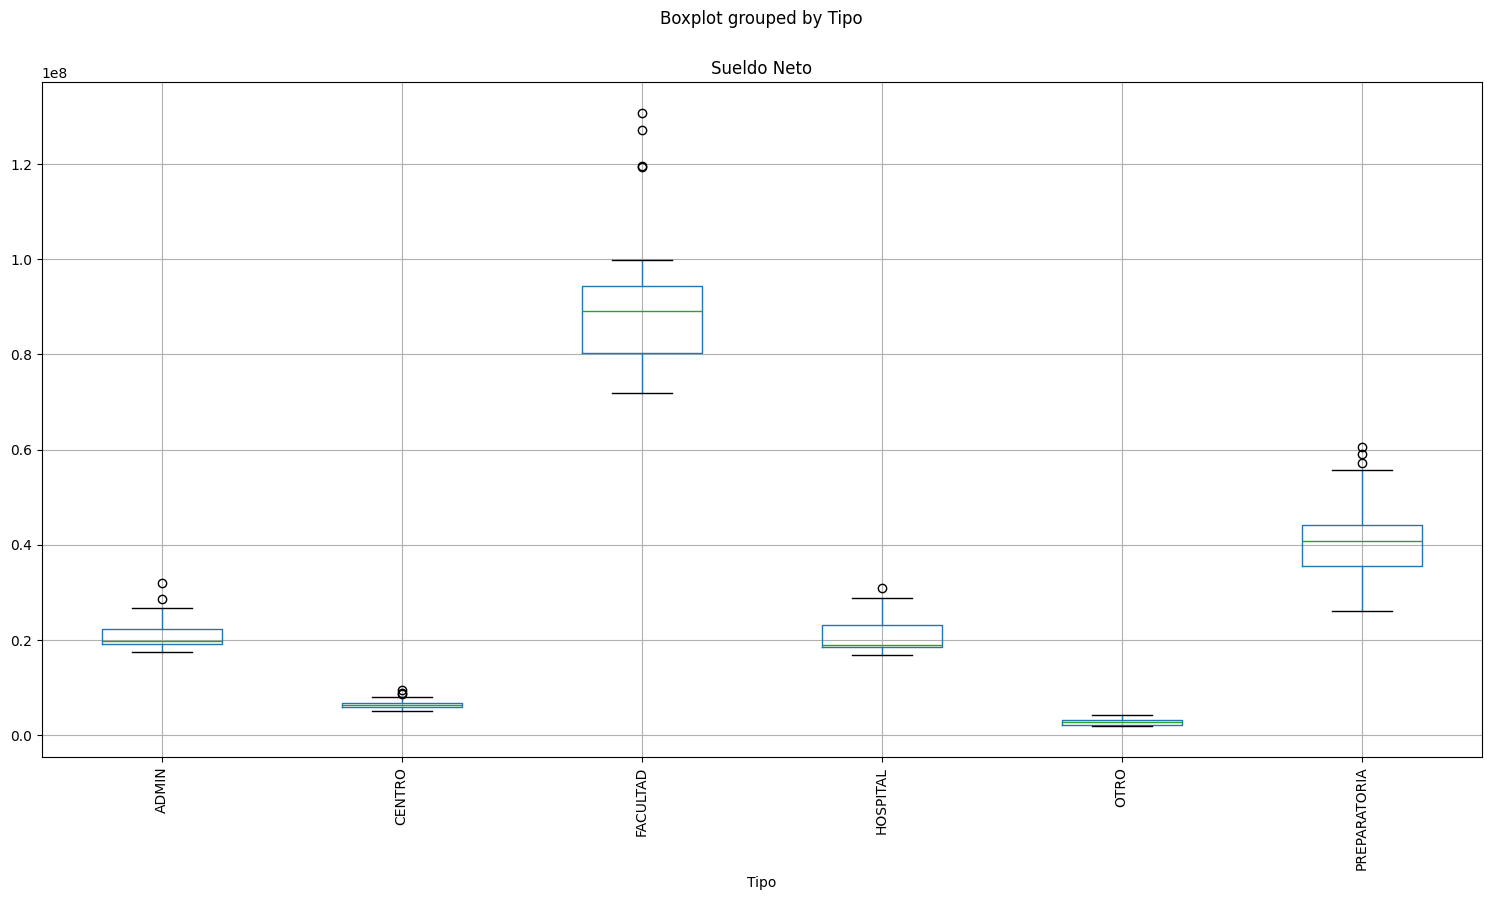

    Tipo  GastoSalarios
0  ADMIN    18235639.07
1  ADMIN    18935541.24
2  ADMIN    18992417.61
3  ADMIN    19214948.64
4  ADMIN    19779973.40
Hay diferencias
                sum_sq     df           F         PR(>F)
Tipo      1.880715e+17    5.0  742.662825  2.397822e-131
Residual  1.063606e+16  210.0         NaN            NaN


In [91]:
analysis("csv/typed_uanl.csv")

# Boxplot de salario total por cada dependencia

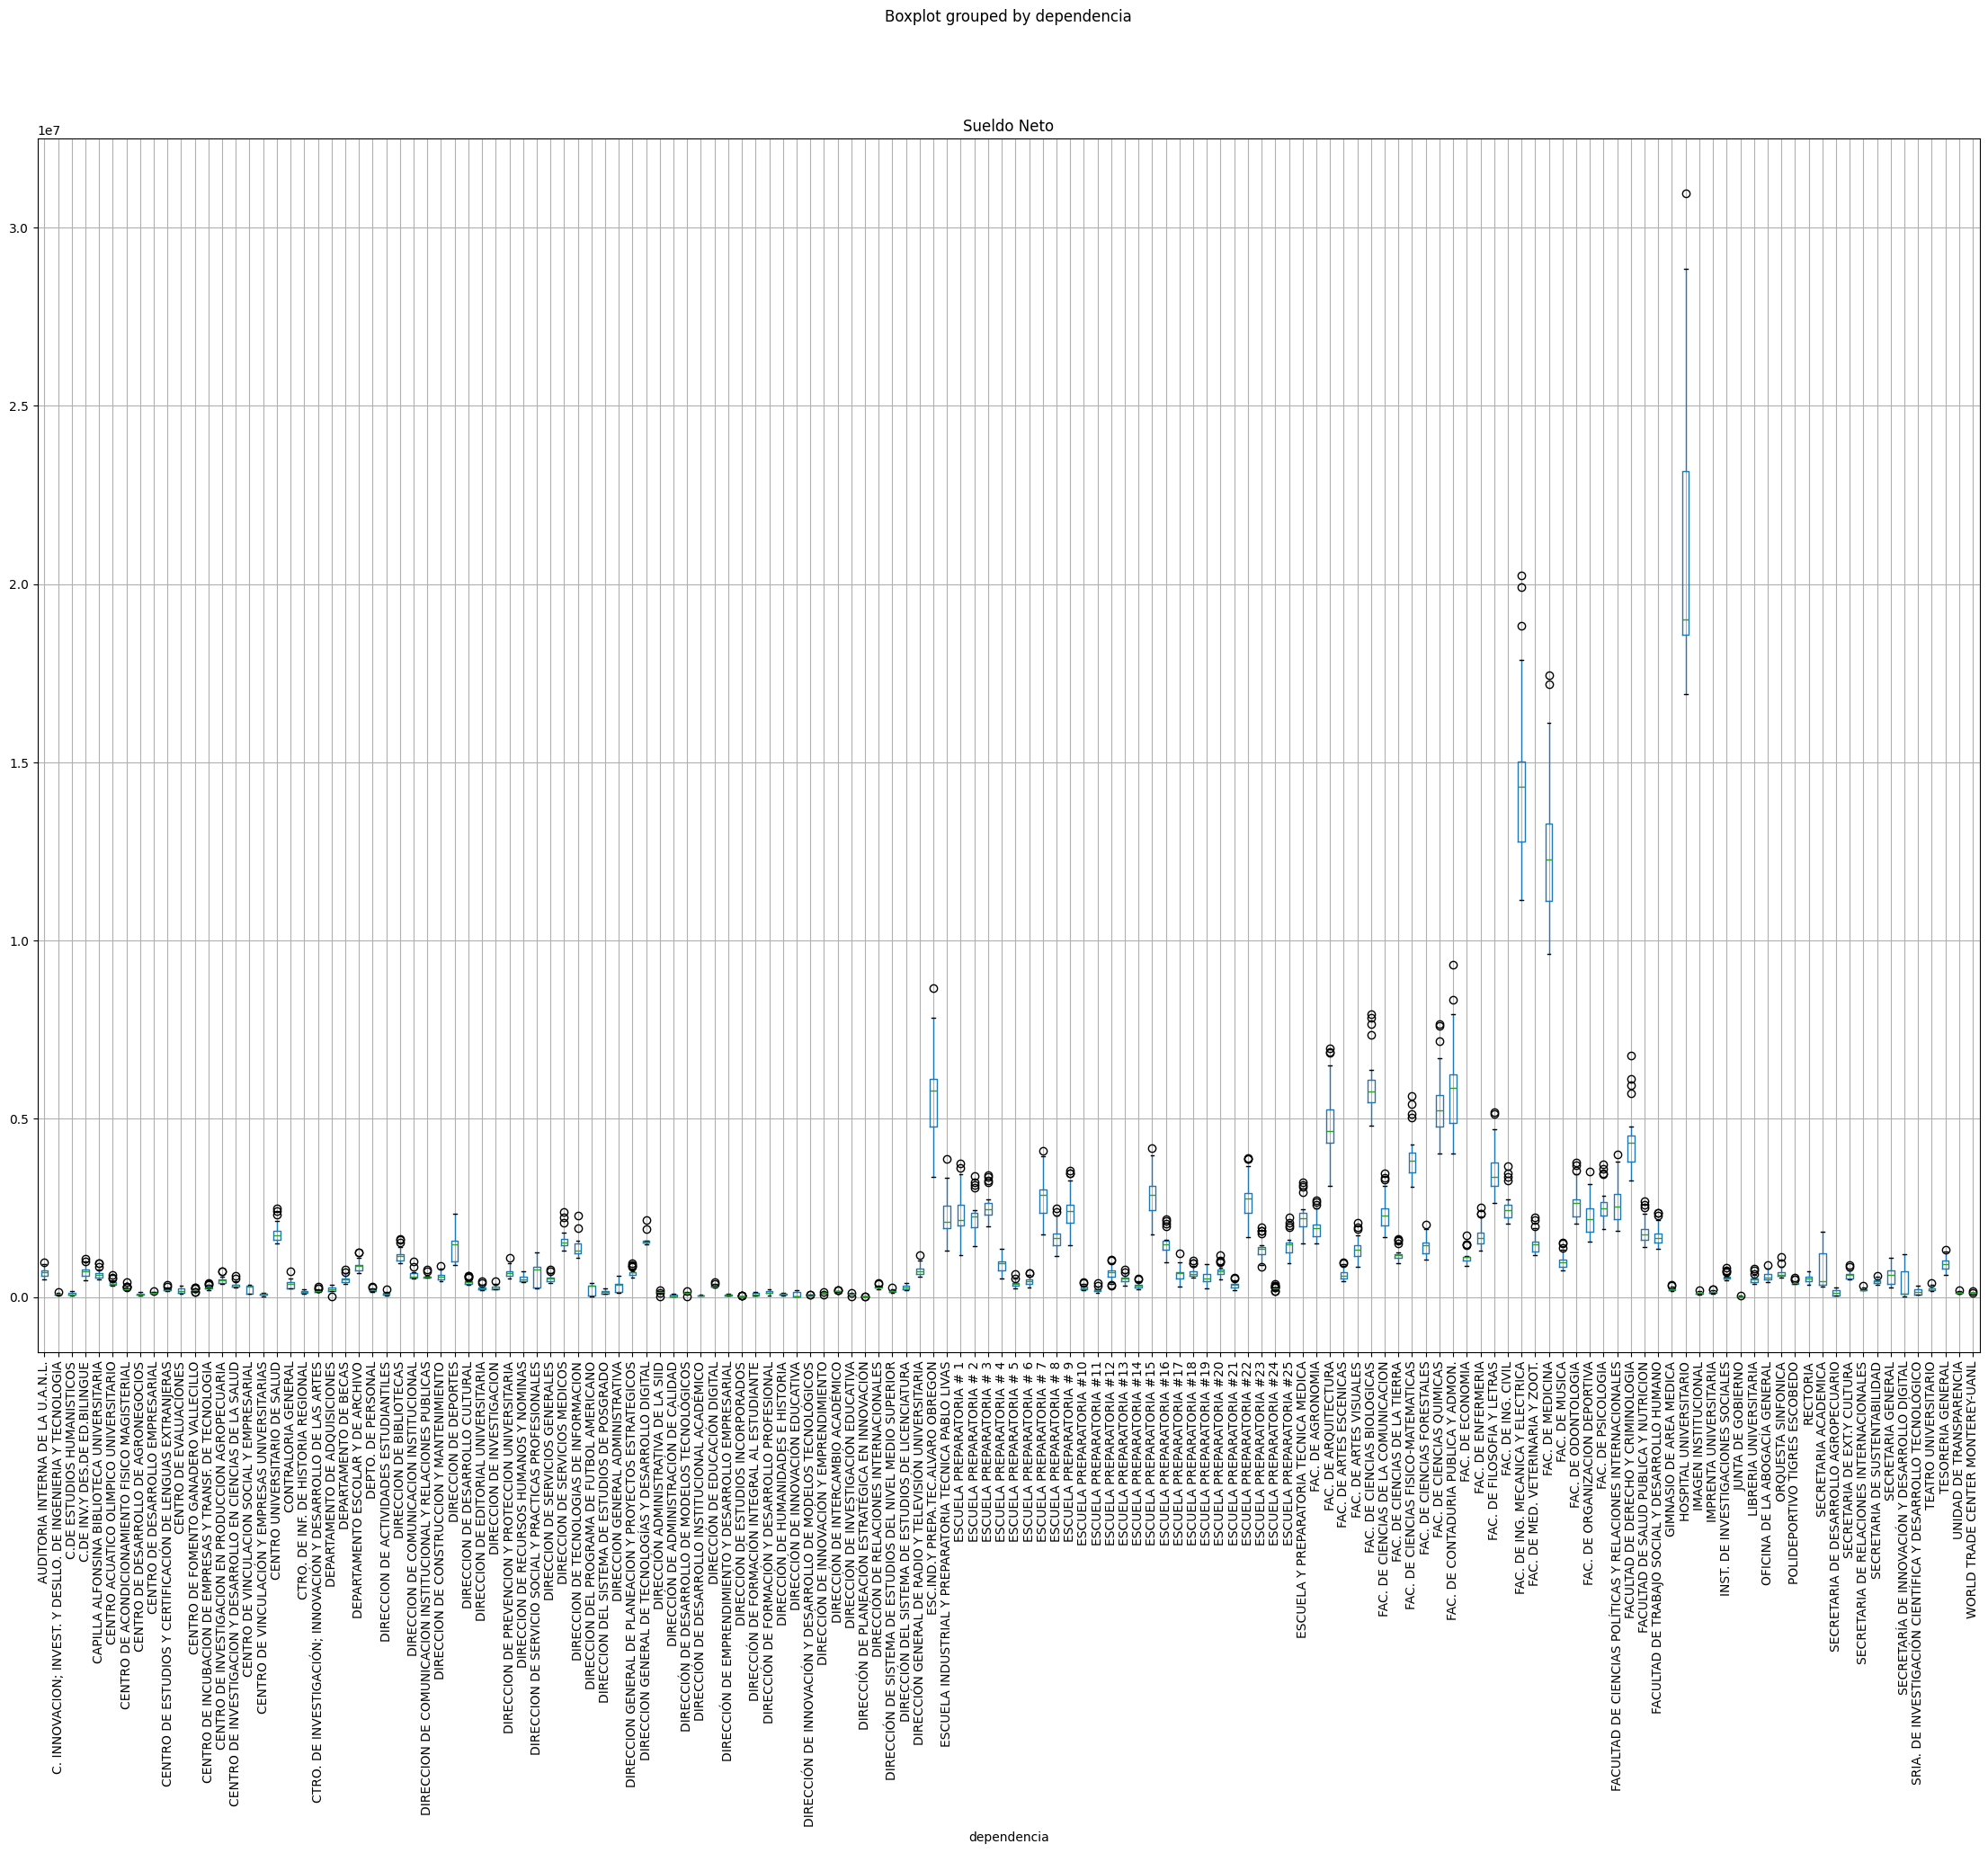

In [96]:
create_boxplot_by_type("csv/typed_uanl.csv", 'dependencia', pd.Series.sum)

### Gráfico de promedio a lo largo del tiempo de todas las dependencias

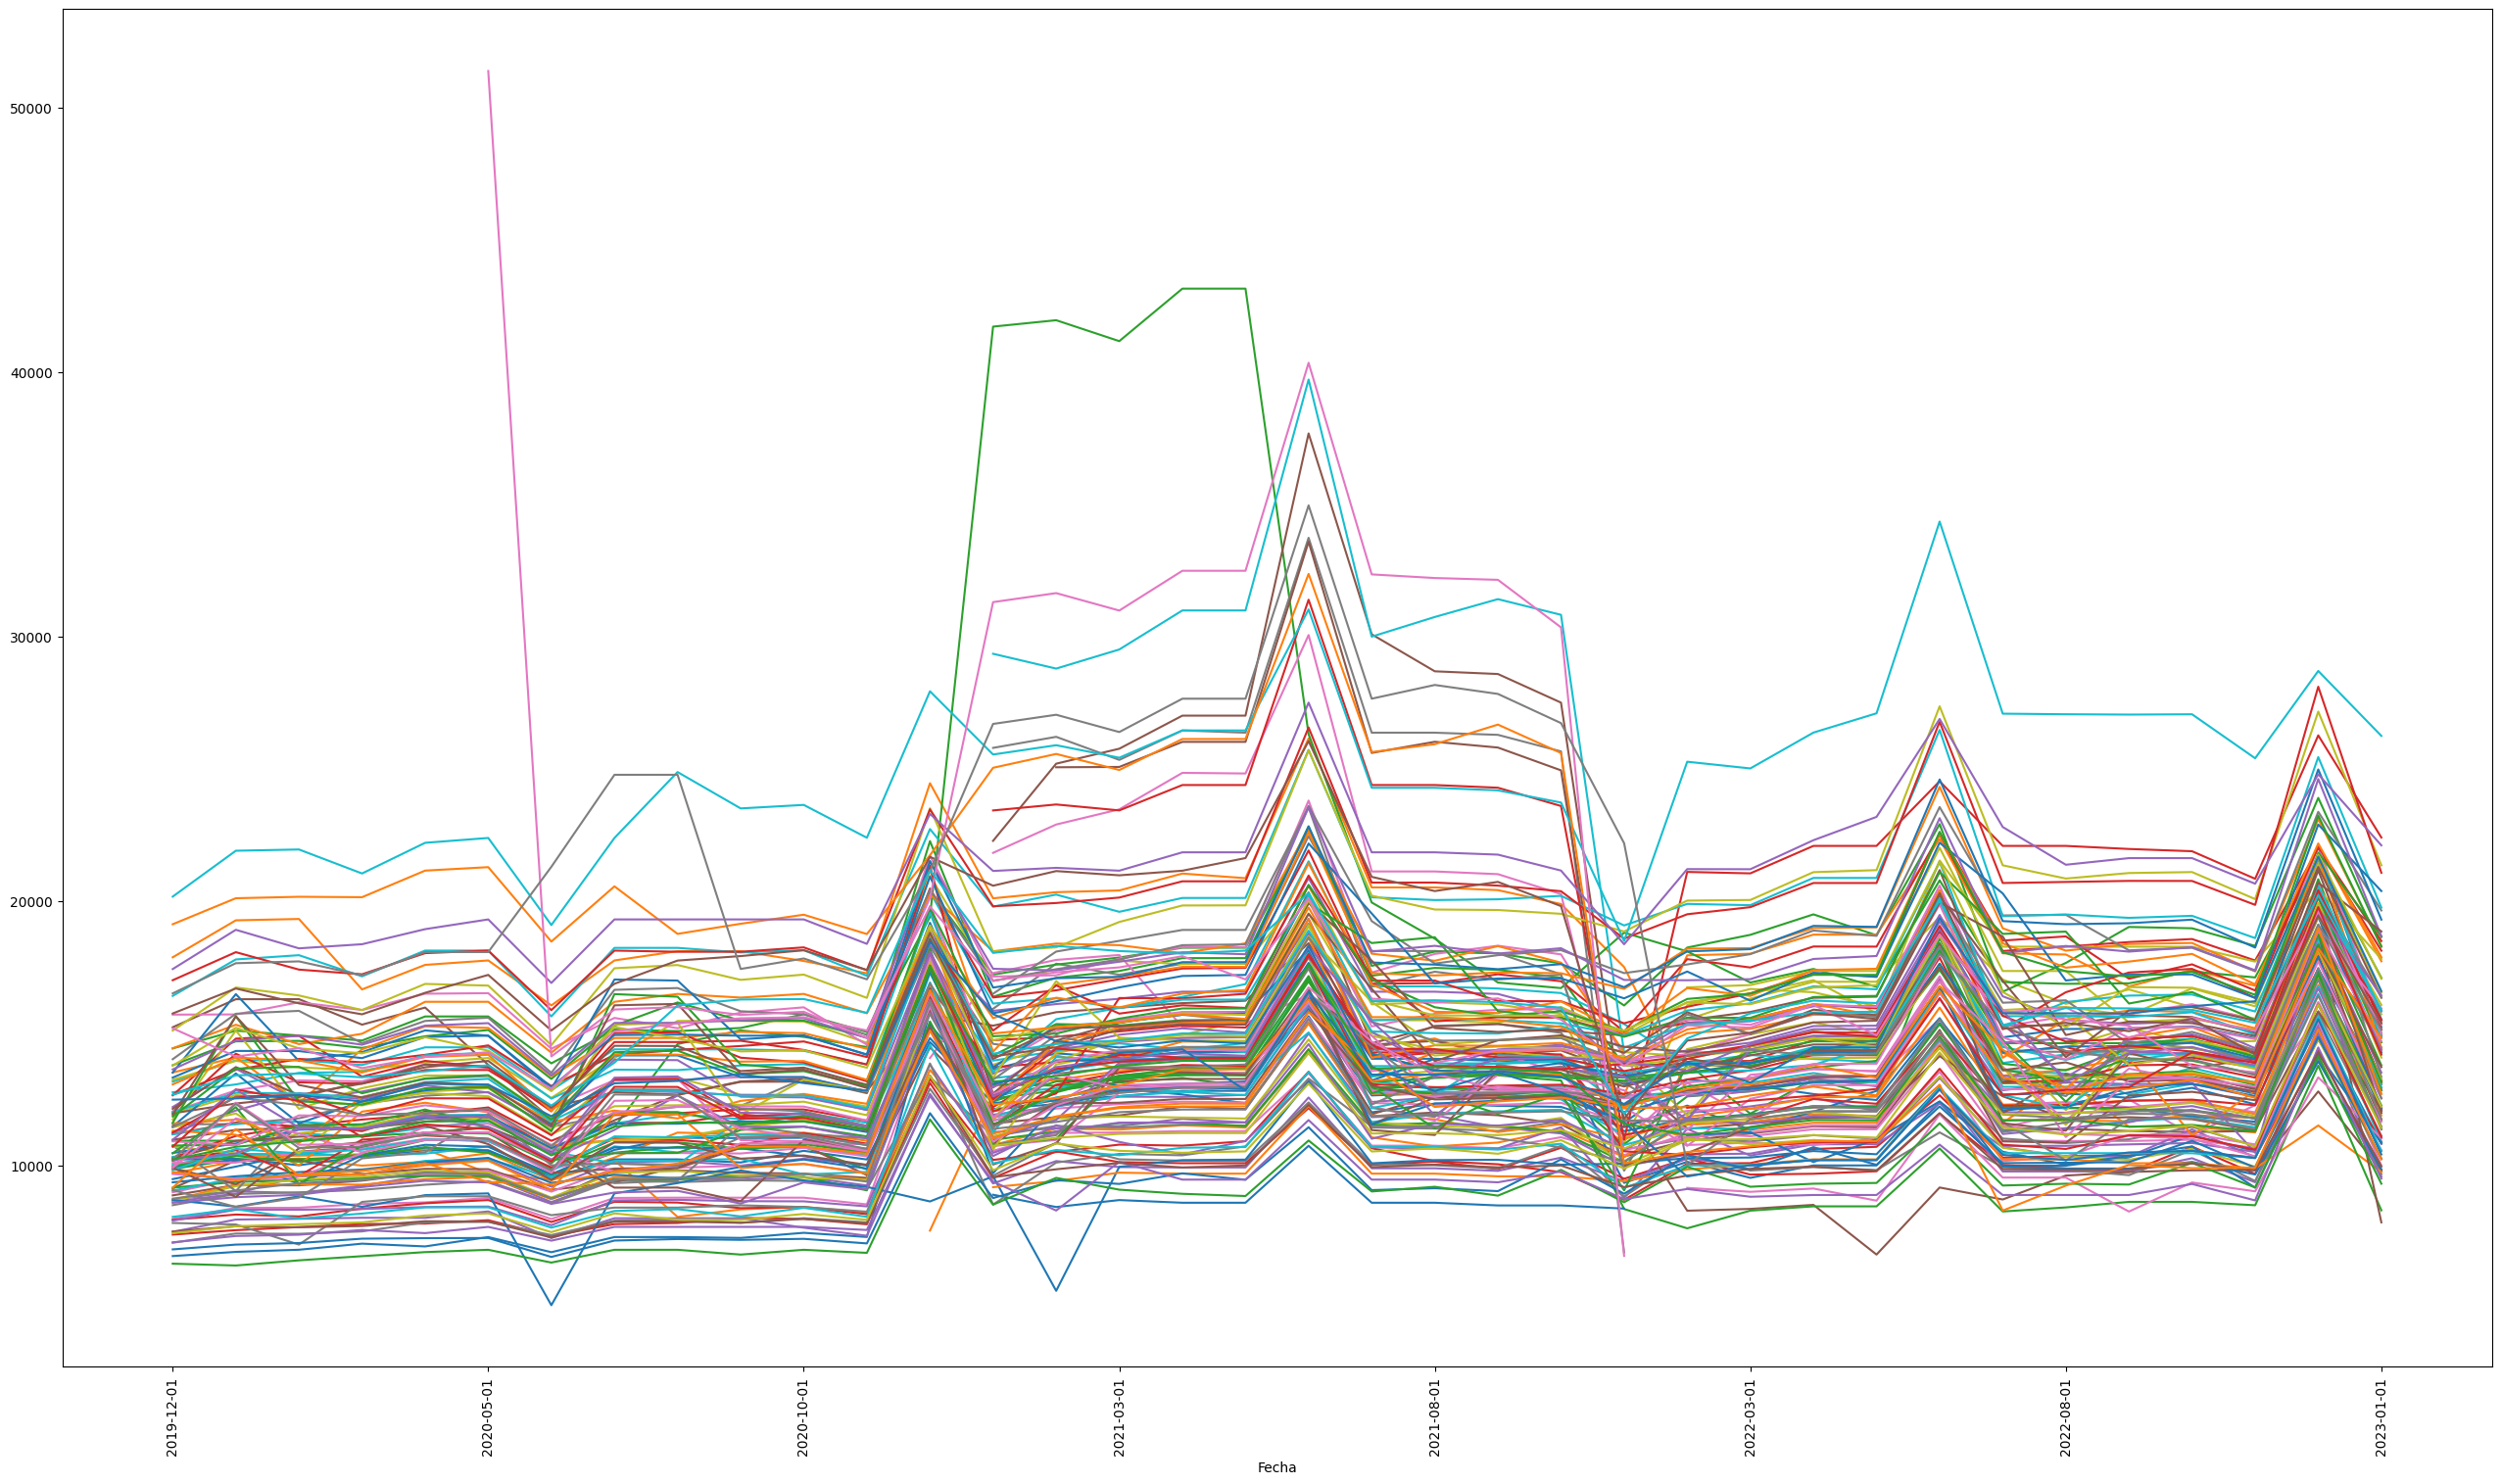

In [123]:
create_plot_por_dependencia("csv/typed_uanl.csv")

# Anova gastos de salarios

Análisis ANOVA para determinar si existen diferencias significativas en el gasto en salarios entre los tipos "CENTRO" y "OTRO"

In [141]:
anova_1("csv/typed_uanl.csv")

      Tipo  GastoSalarios
36  CENTRO     5562617.36
37  CENTRO     5684546.41
38  CENTRO     5805946.61
39  CENTRO     5886917.63
40  CENTRO     6070049.44
Shapiro-Wilk test: ShapiroResult(statistic=0.9051411662230173, pvalue=4.947118674634609e-05)
Levene's test: LeveneResult(statistic=1.7127588853119557, pvalue=0.1949082752099037)
Hay diferencias
                sum_sq    df           F        PR(>F)
Tipo      2.505729e+14   1.0  374.905294  7.997608e-30
Residual  4.678542e+13  70.0         NaN           NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj     lower         upper     reject
--------------------------------------------------------------------
CENTRO   OTRO -3731047.4308   0.0 -4115365.0809 -3346729.7807   True
--------------------------------------------------------------------
